<a href="https://colab.research.google.com/github/vgonzalezg0/PROYECTO-IA/blob/main/01_Exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORACIÓN DE DATOS**


El objetivo de este notebook es examinar y analizar conjuntos de datos para obtener una comprensión general de sus características y patrones, identificando relaciones entre variables y comprendiendo la distribución de los datos.

[Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk)




##1. Librerías

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

#bibliotecas de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
import gc


import warnings
warnings.filterwarnings('ignore')

## 2. Base de Datos 
 

### 2.1 Carga de datos mediante la API de Kaggle

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
ls -a ~

./   .bashrc*  .config/   .jupyter/  .keras/  .npm/     .tmux.conf*
../  .cache/   .ipython/  .kaggle/   .local/  .profile  .wget-hsts


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c home-credit-default-risk
! unzip home-credit-default-risk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open home-credit-default-risk, home-credit-default-risk.zip or home-credit-default-risk.ZIP.


In [ ]:
train = pd.read_csv("application_train.csv")
test = pd.read_csv("application_test.csv")

FileNotFoundError: ignored

### 2.2 Carga de datos mediante Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# train = pd.read_csv('/content/gdrive/MyDrive/application_train.csv')
# test = pd.read_csv('/content/gdrive/MyDrive/application_test.csv')

##3. Información

In [ ]:
train.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

##4. Datos faltantes

In [ ]:
k = train.isna().sum()
print(f"Datos Faltantes por Columna: \n\n{k[k!=0]}")

Datos Faltantes por Columna: 

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64


Porcentaje

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False)
missing_train = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_train

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


##5. Variable Objetivo

In [ ]:
duplicates = train.duplicated()
print("Número de filas duplicadas:", duplicates.sum())

Número de filas duplicadas: 0


In [ ]:
duplicates = train['SK_ID_CURR'].duplicated()
print("Número de valores duplicados en la columna SK_ID_CURR:", duplicates.sum())

Número de valores duplicados en la columna SK_ID_CURR: 0


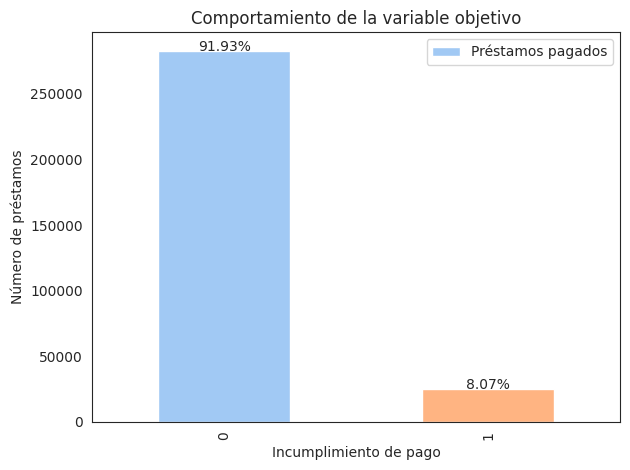

In [ ]:
counts = train['TARGET'].value_counts()

ax = counts.plot(kind='bar', color=sns.color_palette("pastel"))

for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(train) * 100:.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline')

#plt.legend(labels = ['Préstamos pagados', 'Préstamos no pagados'], loc="best")

plt.title('Comportamiento de la variable objetivo')
plt.xlabel('Incumplimiento de pago')
plt.ylabel('Número de préstamos')

plt.tight_layout()
plt.show()


##6. Variables - Columnas

In [ ]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

Gráficos de los histogramas de las distribuciones de las variables

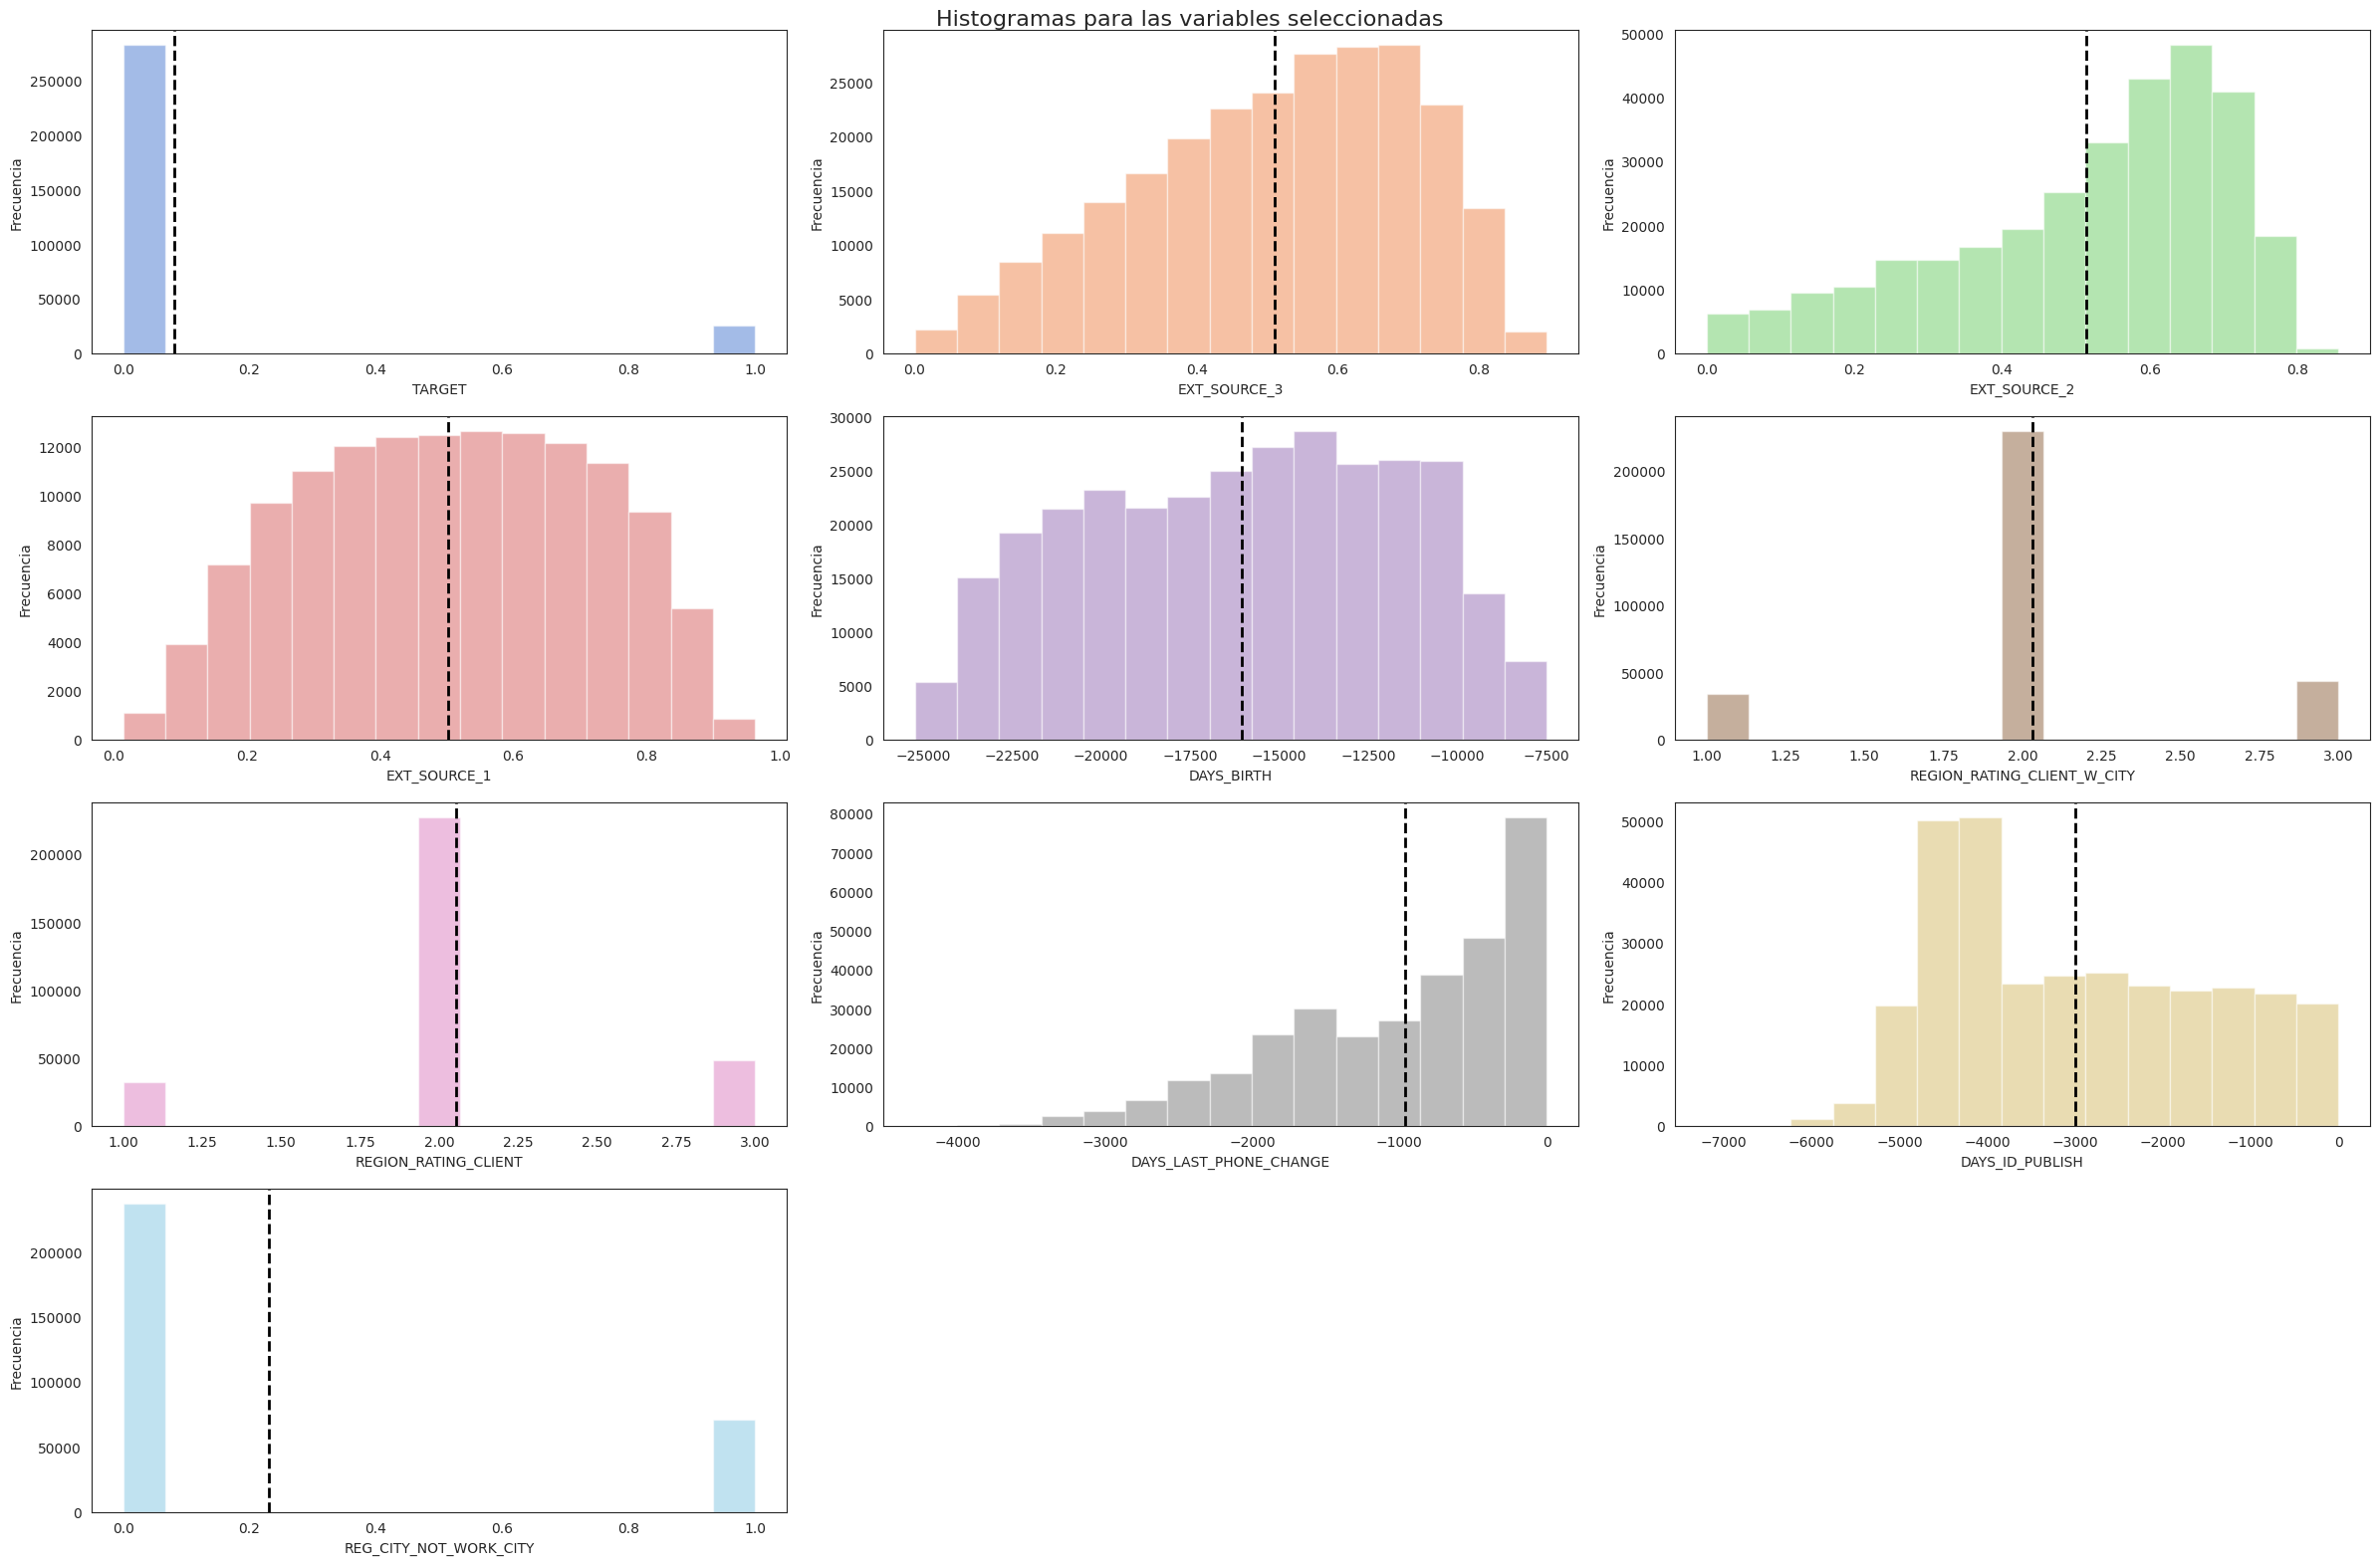

In [ ]:
# determinar correlación con la variable objetivo
corr = train.corr()['TARGET'].abs().sort_values(ascending=False)

sns.set_style("white")
palette = sns.color_palette("muted")

# seleccionar columnas con mayor correlación
cols = corr[corr >= 0.05].index.tolist()

if len(cols) > 0:
    
     # definir tamaño de la figura
    n_rows = (len(cols) // 3) + (len(cols) % 3 > 0)
    plt.figure(figsize=(24, 4 * n_rows))

    for i, col in enumerate(cols):
        plt.subplot(n_rows, 3, i+1)
        plt.hist(train[col], bins=15, color=palette[i], alpha=0.5)
        
        # agregar línea de media
        plt.axvline(train[col].mean(), color='black', linestyle='dashed', linewidth=2)

        plt.xlabel(col)
        plt.ylabel('Frecuencia')

    plt.suptitle('Histogramas para las variables seleccionadas', fontsize=16)
    plt.tight_layout()
    plt.show()

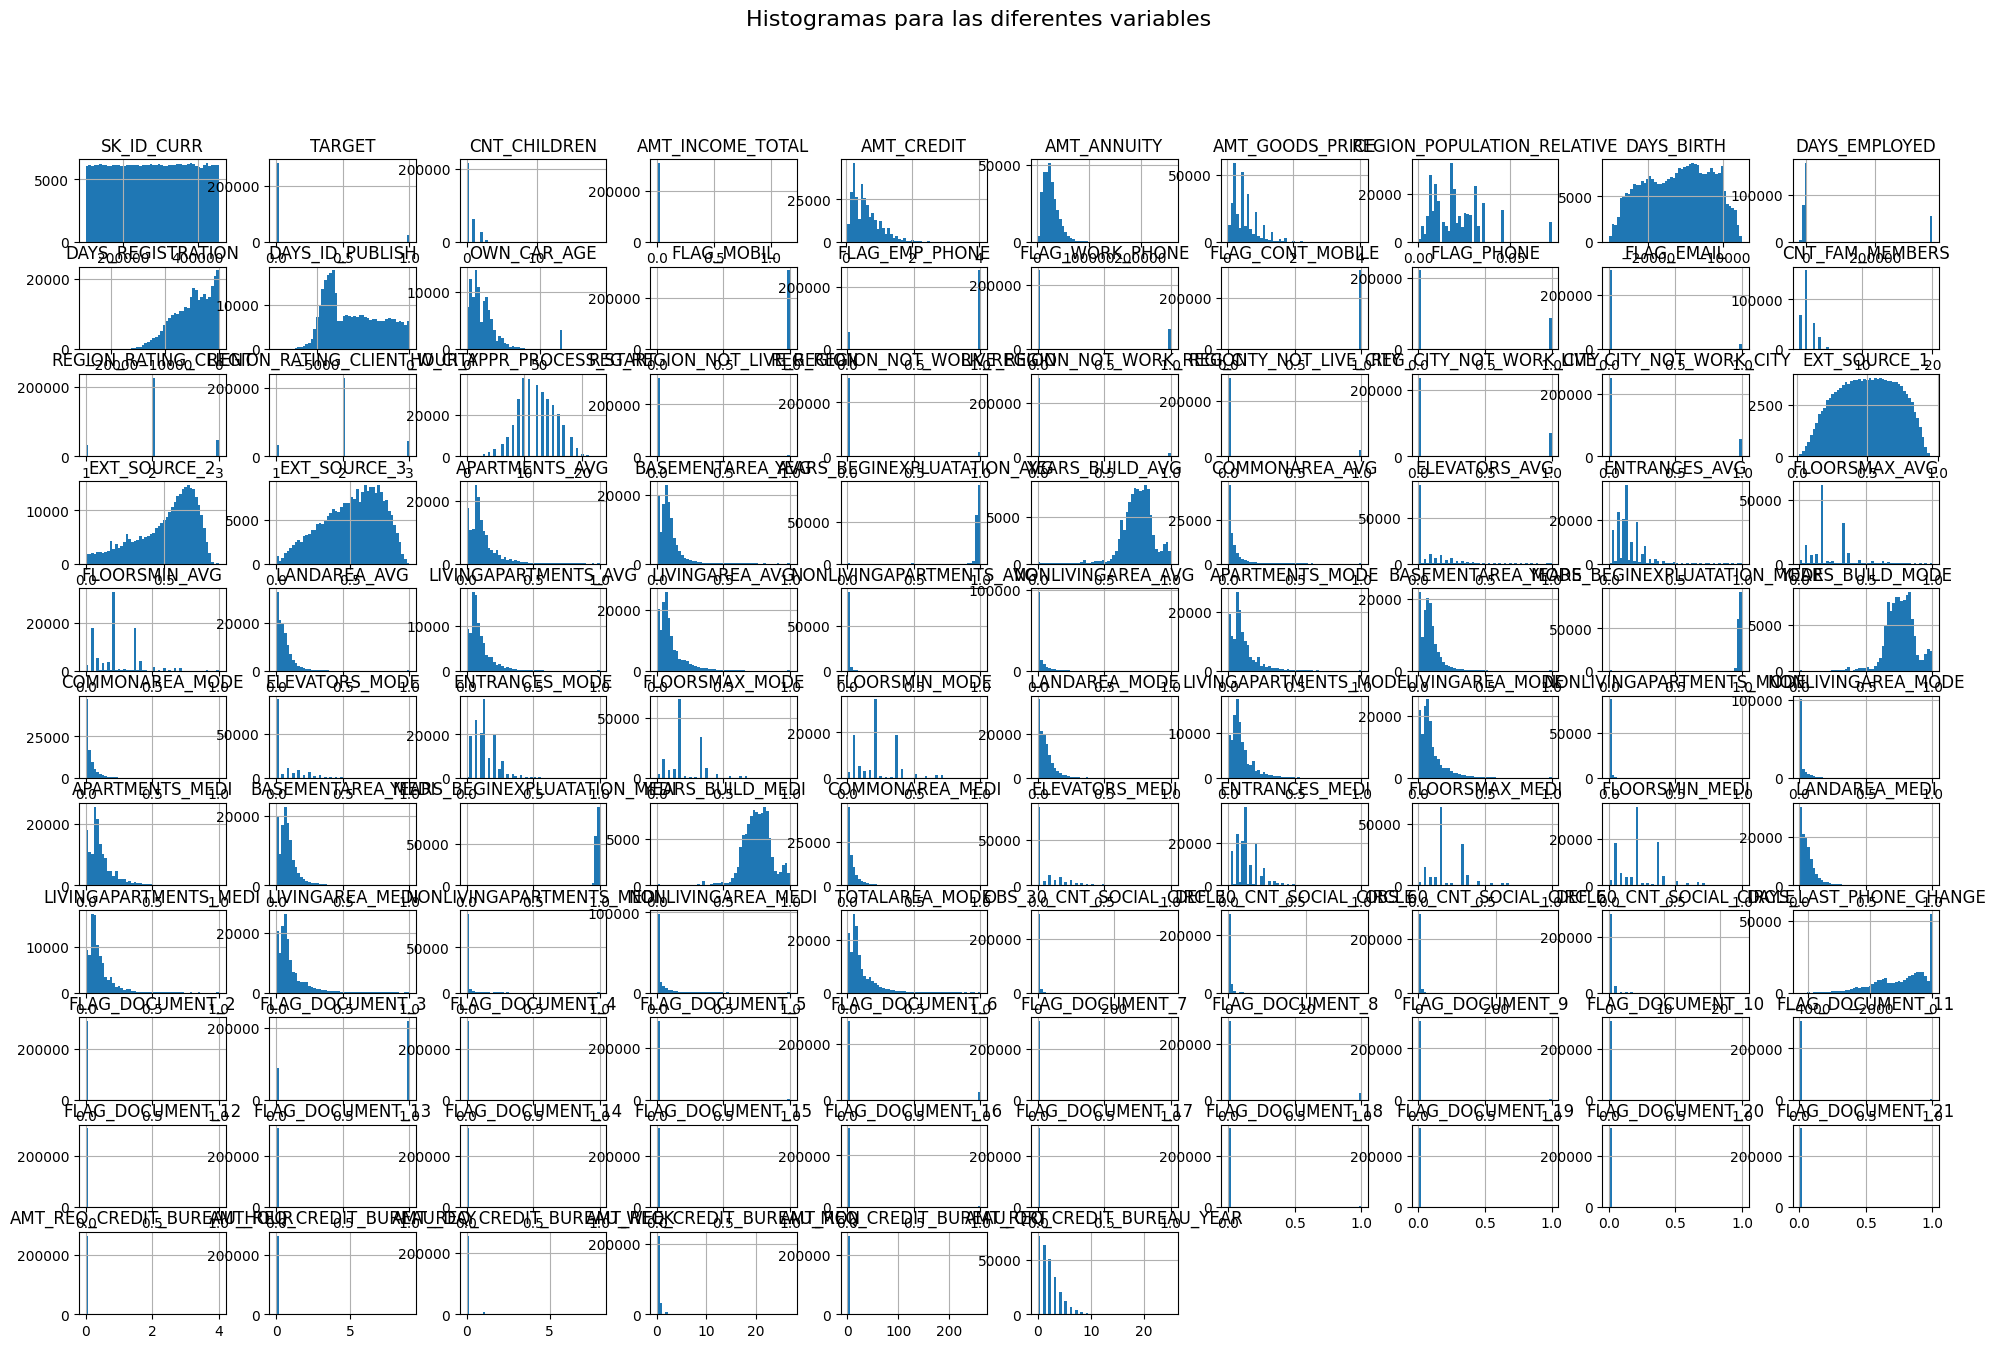

In [ ]:
train.hist(bins = 50, figsize = (24, 15))
plt.suptitle('Histogramas para las Diferentes Variables', fontsize = 16)
plt.show()

###6.1 Numéricas

In [ ]:
ncols = [i for i in train.columns if i in train._get_numeric_data()]
print(f"{len(ncols)} variables numéricas: \n{ncols}")

106 variables numéricas: 
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGI

In [ ]:
train._get_numeric_data().describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### 6.2 Categóricas

In [ ]:
ccols = [i for i in train.columns if not i in train._get_numeric_data()]
print(f"{len(ccols)} variables categóricas: \n{ccols}")

16 variables categóricas: 
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [ ]:
for c in ccols:
    print ("\n"+"%10s"%c, np.unique(train[c].dropna()))


NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']

CODE_GENDER ['F' 'M' 'XNA']

FLAG_OWN_CAR ['N' 'Y']

FLAG_OWN_REALTY ['N' 'Y']

NAME_TYPE_SUITE ['Children' 'Family' 'Group of people' 'Other_A' 'Other_B'
 'Spouse, partner' 'Unaccompanied']

NAME_INCOME_TYPE ['Businessman' 'Commercial associate' 'Maternity leave' 'Pensioner'
 'State servant' 'Student' 'Unemployed' 'Working']

NAME_EDUCATION_TYPE ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']

NAME_FAMILY_STATUS ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Unknown'
 'Widow']

NAME_HOUSING_TYPE ['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']

OCCUPATION_TYPE ['Accountants' 'Cleaning staff' 'Cooking staff' 'Core staff' 'Drivers'
 'HR staff' 'High skill tech staff' 'IT staff' 'Laborers'
 'Low-skill Laborers' 'Managers' 'Medicine staff' 'Private service staff'
 'Realty agents' 'Sales staff

###6.3 Correlaciones


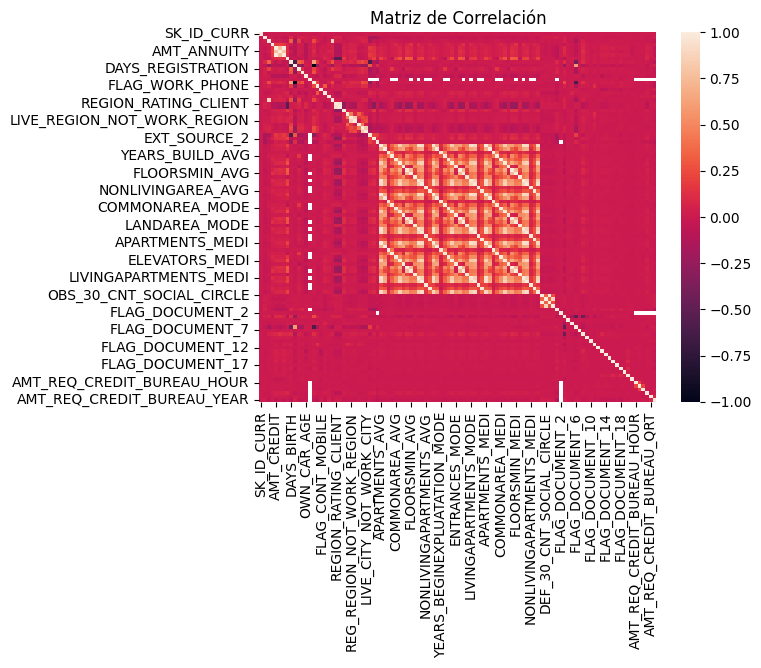

In [ ]:
corr_matrix = train.corr()

sns.heatmap(corr_matrix, annot = False, vmin = -1, vmax = 1).set_title('Matriz de Correlación')
plt.show()


In [ ]:
# Calcular la correlación entre las variables y el target
corr_matrix = train.corr()
corr_with_target = corr_matrix["TARGET"].sort_values(ascending = False)

In [ ]:
# Seleccionar las 20 variables con mayor correlación con el target
selected_vars = corr_with_target[1:21].index.tolist()
train_selected = train[selected_vars]

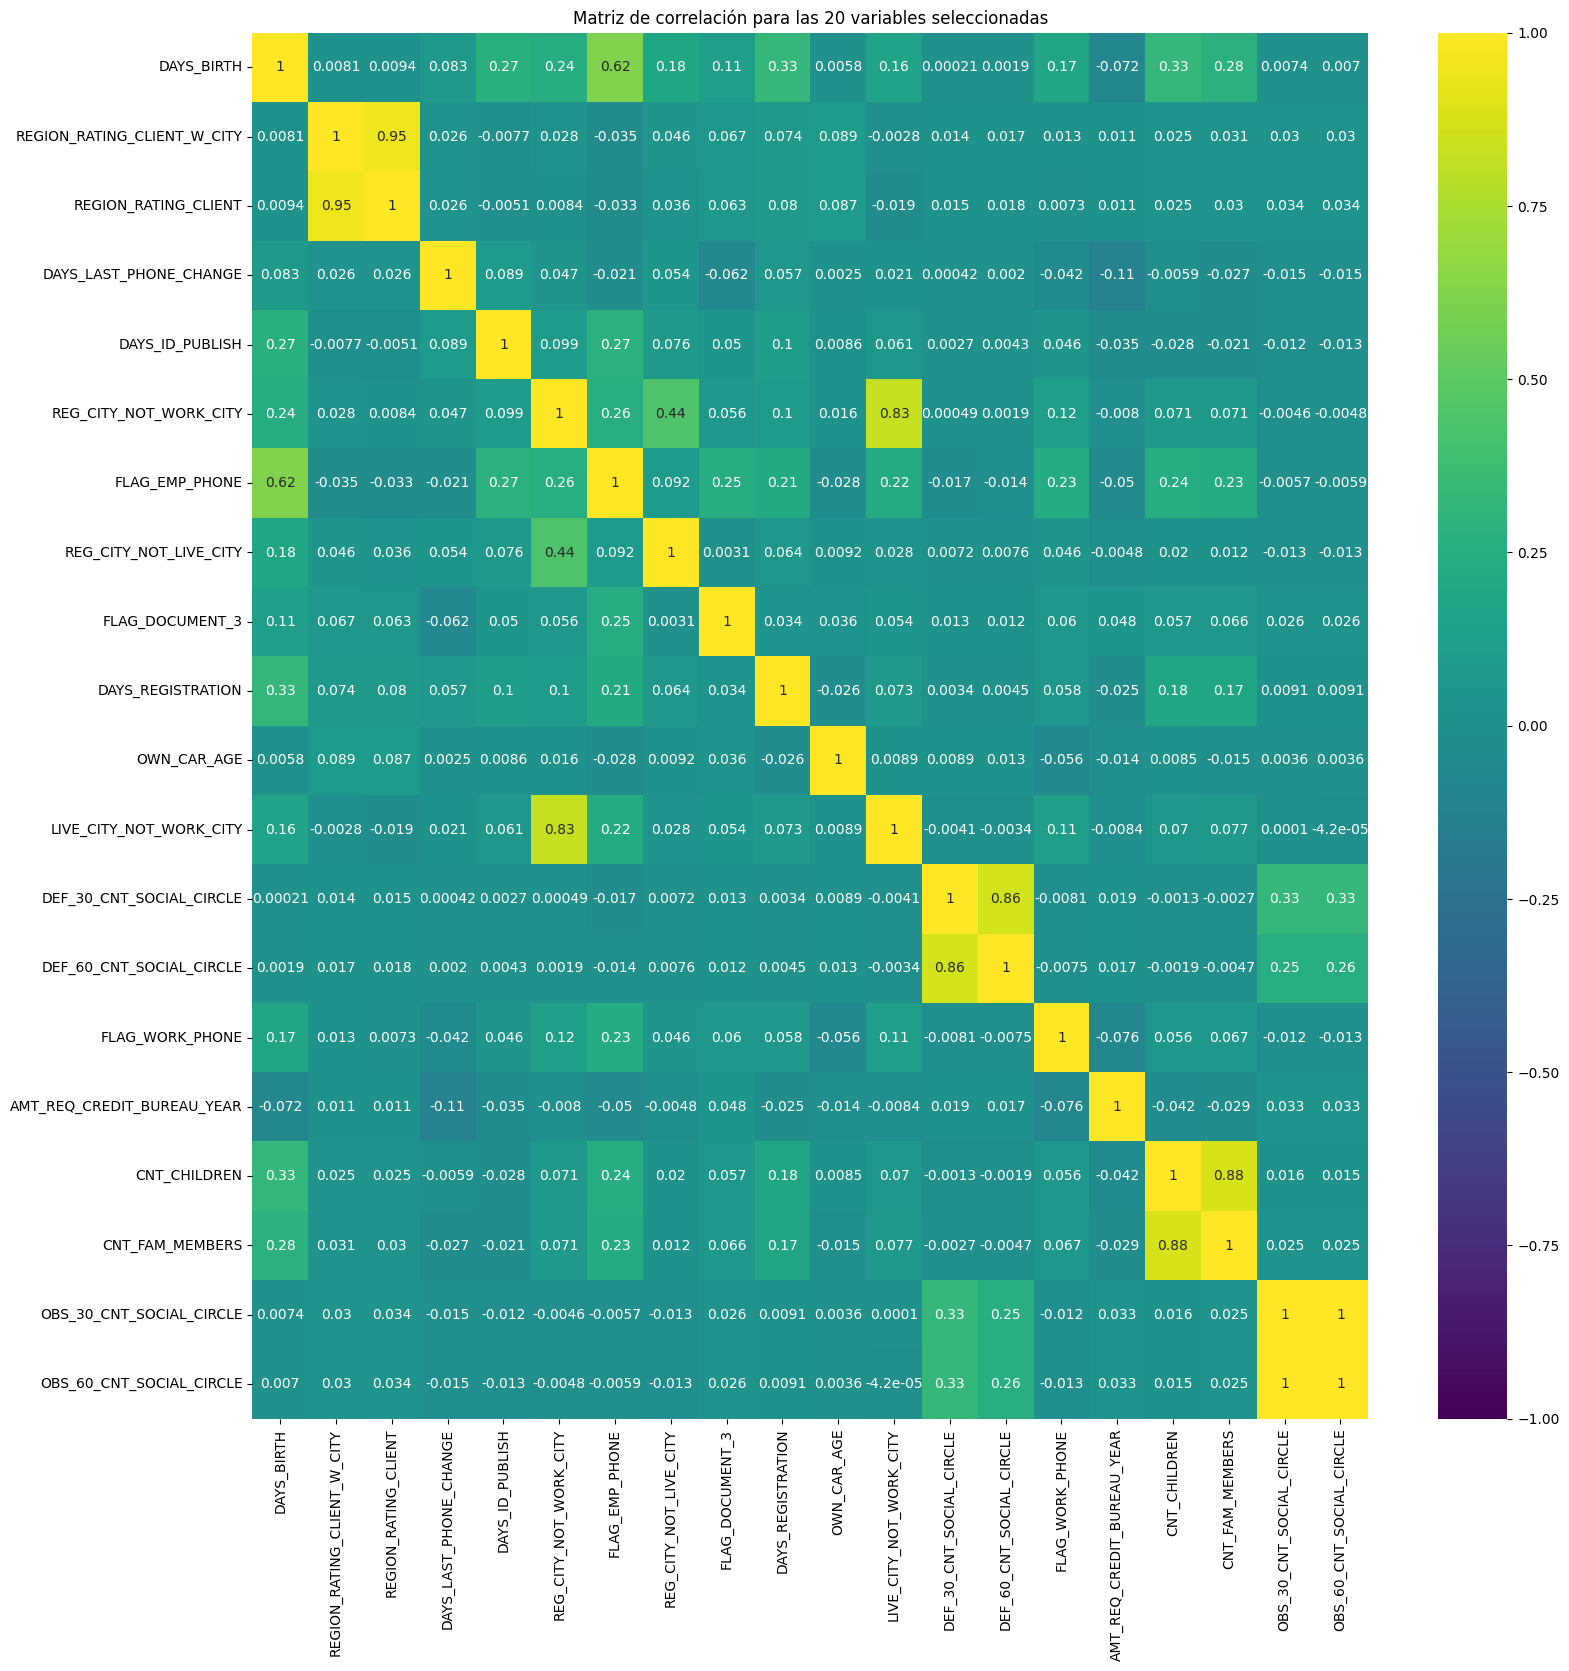

In [ ]:
# Generar heatmap
plt.figure(figsize=(18, 18))
corr_matrix = train_selected.corr()
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "viridis").set_title('Matriz de correlación para las 20 variables seleccionadas')
plt.show()

In [ ]:
# Codificar las variables categóricas
le = LabelEncoder()
for col in train.columns:
    if train[col].dtype == 'object':
        if len(train[col].unique()) <= 2:
            le.fit(train[col])
            train[col] = le.transform(train[col])
        else:
            train = pd.get_dummies(train, columns=[col], drop_first=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 230 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(65), int64(44), uint8(121)
memory usage: 291.2 MB


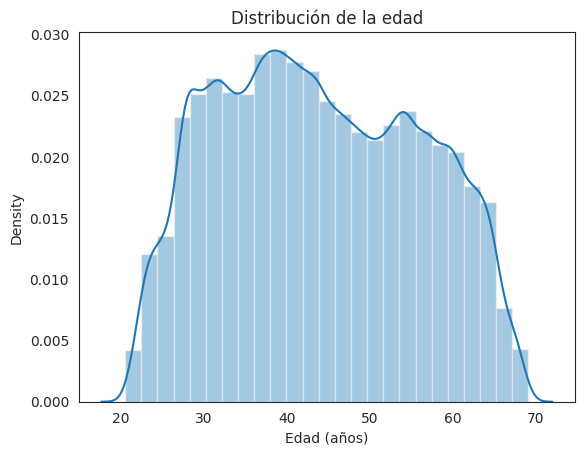

In [ ]:
# Distribución de la edad
sns.distplot(train['DAYS_BIRTH'] / -365, bins=25)
plt.title('Distribución de la edad')
plt.xlabel('Edad (años)')
plt.show()

In [ ]:
train['DAYS_BIRTH']

NameError: ignored

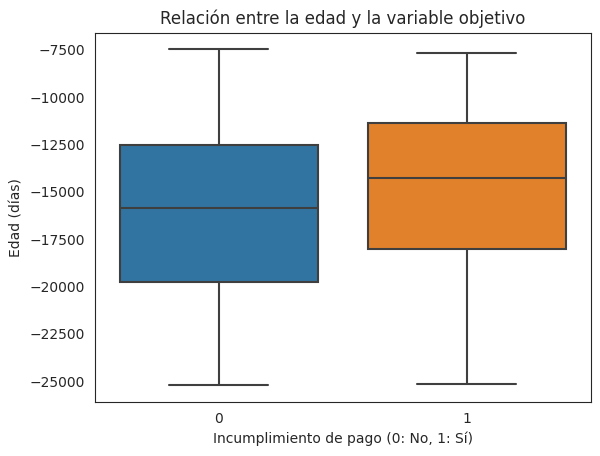

In [ ]:
# Relación entre la edad y la variable objetivo
sns.boxplot(x='TARGET', y='DAYS_BIRTH', data=train)
plt.title('Relación entre la edad y la variable objetivo')
plt.xlabel('Incumplimiento de pago (0: No, 1: Sí)')
plt.ylabel('Edad (días)')
plt.show()

In [ ]:
# Eliminar columnas con más del 50% de valores perdidos
threshold = len(train) * 0.5
train.dropna(thresh=threshold, axis=1, inplace=True)

# Eliminar filas con valores perdidos en la variable objetivo
train.dropna(subset=['TARGET'], axis=0, inplace=True)

train.shape

(307511, 192)

In [ ]:
train.mean()

SK_ID_CURR                         278180.518577
TARGET                                  0.080729
NAME_CONTRACT_TYPE                      0.095213
FLAG_OWN_CAR                            0.340108
FLAG_OWN_REALTY                         0.693673
                                       ...      
WALLSMATERIAL_MODE_Others               0.005284
WALLSMATERIAL_MODE_Panel                0.214757
WALLSMATERIAL_MODE_Stone, brick         0.210773
WALLSMATERIAL_MODE_Wooden               0.017437
EMERGENCYSTATE_MODE_Yes                 0.007570
Length: 192, dtype: float64

In [ ]:
train = train.fillna(train.mean())

Es importante verificar que no queden datos vacíos en el conjunto de datos final.

In [ ]:
print(train.isna().sum().sum())

0
